Fourier transfrom is an useful tool in analytical approaches. They can determine the periodic features in data or can delete redundant noises.

In the following, I start with a single sine wave (remember that for sin(bx), T=2*pi/b):

In [ ]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
from scipy.fft import rfft
from scipy.fft import rfftfreq
from scipy.signal import find_peaks

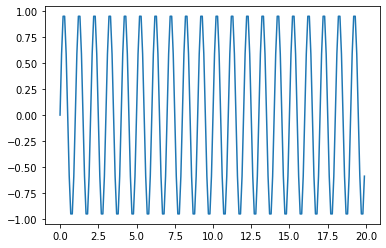

In [ ]:
x = np.arange(0,20,0.1)
sinn = np.sin(2*np.pi*x) # frequency = 1
plt.plot(x,sinn)
plt.show()

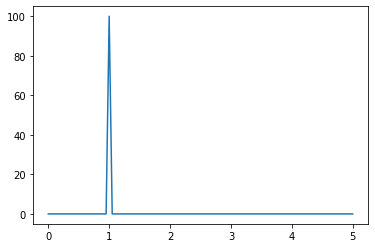

In [ ]:
f_sinn = rfft(sinn) # rfft stands for real fast fourier transform
f_k = rfftfreq(len(sinn), 20/len(sinn))

plt.plot(f_k,np.abs(f_sinn)) # rfft returns imaginary part, therefore, we must convert them to real numbers
plt.show()

As you can see, it shows that our signal has a peridoic pattern in w = 1 (remember that we generate a sin wave with f = 1).

Lets combine two different waves (with f = 1 and 2):

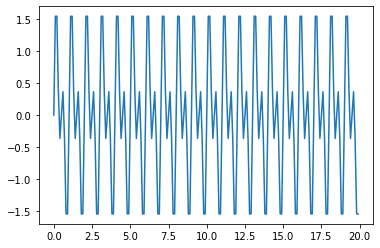

200


In [ ]:
x = np.arange(0,20,0.1)
sinn = np.sin(2*np.pi*x) + np.sin(4*np.pi*x)
plt.plot(x,sinn)
plt.show()
print (len(sinn))

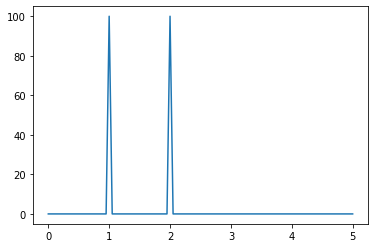

In [ ]:
f_sinn = rfft(sinn)
f_k = rfftfreq(len(sinn), 20/len(sinn))

plt.plot(f_k,np.abs(f_sinn))
plt.show()

Again, it is obvious that our signal's period is in w = 1 & 2

We can do the same thing for sun spot (read its notebook to get some information):

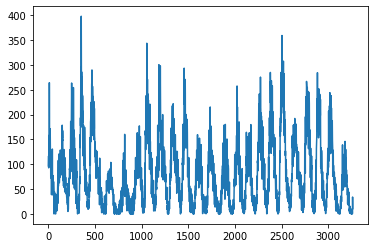

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Sunspots.csv')
dataa = data.Monthly.values
plt.plot(dataa)

from this graph, we can not understand the underlying feature, so we must transform it to the fourier space:

In [ ]:
# it is better to normalize data:
dataa = (dataa-np.mean(dataa))/np.std(dataa)

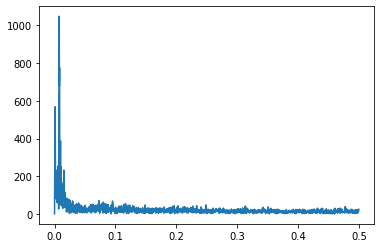

In [ ]:
f_dataa = rfft(dataa)
f_k = rfftfreq(len(dataa), 1)

plt.plot(f_k,np.abs(f_dataa))
plt.show()

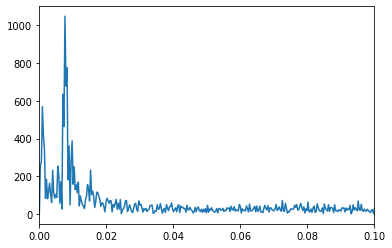

In [ ]:
# you can see that the [0,0.1] range is informative for us:
plt.plot(f_k,np.abs(f_dataa))
plt.xlim(0,0.1)
plt.show()

In [ ]:
# Usually, associated information is in the peak so we should locate that:
peakk = np.argmax(np.abs(f_dataa))
print (f_k[peakk])
print (np.abs(f_dataa[peakk]))

0.007656967840735069
1048.491010927006


In [ ]:
# t = 1/w
t = 1/f_k[peakk]
print (t)

130.6


so the data has a period of 130 months which is the same as the previuos work